In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

In [2]:
df_train = pd.read_csv('train.csv', index_col=0)
display(df_train.head())

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
original_df = df_train.copy()

## Type Correction

In [3]:
# check types
df_train.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [4]:
df_train.nunique()

HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [5]:
# unique values
df_train.nunique()
df_train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']].apply(lambda x: x.unique())

HomePlanet                         [Europa, Earth, Mars, nan]
CryoSleep                                  [False, True, nan]
Destination    [TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]
VIP                                        [False, True, nan]
Transported                                     [False, True]
dtype: object

In [6]:
# transfrom CryoSleep, VIP and Transported to float64
display(df_train[['CryoSleep', 'VIP', 'Transported']])
df_train['CryoSleep'] = df_train['CryoSleep'].astype('float64')
df_train['VIP'] = df_train['VIP'].astype('float64')
df_train['Transported'] = df_train['Transported'].astype('float64')
display(df_train[['CryoSleep', 'VIP', 'Transported']])

,CryoSleep,VIP,Transported
PassengerId,,,
0001_01,False,False,False
0002_01,False,False,True
0003_01,False,True,False
0003_02,False,False,False
0004_01,False,False,True
...,...,...,...
9276_01,False,True,False
9278_01,True,False,False
9279_01,False,False,True


,CryoSleep,VIP,Transported
PassengerId,,,
0001_01,0.0,0.0,0.0
0002_01,0.0,0.0,1.0
0003_01,0.0,1.0,0.0
0003_02,0.0,0.0,0.0
0004_01,0.0,0.0,1.0
...,...,...,...
9276_01,0.0,1.0,0.0
9278_01,1.0,0.0,0.0
9279_01,0.0,0.0,1.0


## Pick out categorical and numerical columns

In [7]:
# Drop out unnecessary columns
to_drop = ['Name', 'Cabin']
df_train.drop(to_drop, axis=1, inplace=True)

In [8]:
# categorical columns
cat_columns = df_train.select_dtypes('object').columns
display(df_train[cat_columns])
display(df_train[cat_columns].nunique())
display(df_train['HomePlanet'].value_counts())
display(df_train['Destination'].value_counts())

,HomePlanet,Destination
PassengerId,,
0001_01,Europa,TRAPPIST-1e
0002_01,Earth,TRAPPIST-1e
0003_01,Europa,TRAPPIST-1e
0003_02,Europa,TRAPPIST-1e
0004_01,Earth,TRAPPIST-1e
...,...,...
9276_01,Europa,55 Cancri e
9278_01,Earth,PSO J318.5-22
9279_01,Earth,TRAPPIST-1e


HomePlanet     3
Destination    3
dtype: int64

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [9]:
num_columns = df_train.select_dtypes('float').columns
df_train[num_columns]

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,
0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
9276_01,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0
9278_01,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9279_01,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0


## Missing values columns

In [10]:
# check for None
df_train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [11]:
# create duplicates for missing columns
df_missing = df_train.isnull().drop('Transported', axis=1).astype('float')
df_missing.columns = [f'miss_{c}' for c in df_train.columns[:-1]]
df_missing = pd.concat([df_train, df_missing], axis=1)
display(df_missing)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,miss_HomePlanet,miss_CryoSleep,miss_Destination,miss_Age,miss_VIP,miss_RoomService,miss_FoodCourt,miss_ShoppingMall,miss_Spa,miss_VRDeck
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,0.0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002_01,Earth,0.0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003_01,Europa,0.0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003_02,Europa,0.0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004_01,Earth,0.0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,0.0,55 Cancri e,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9278_01,Earth,1.0,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9279_01,Earth,0.0,TRAPPIST-1e,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


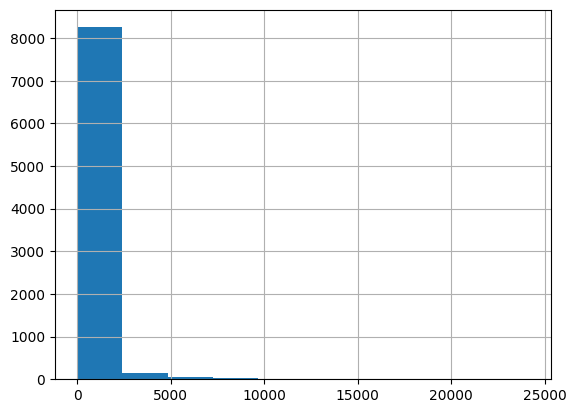

304.8547912992357

0.0

In [12]:
# check for every column
col = 'VRDeck'
df_train[col].hist()
plt.show()
display(df_train[col].mean())
display(df_train[col].median())

In [13]:
df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0], inplace=True)
df_train['CryoSleep'].fillna(method='ffill', inplace=True)
df_train['Destination'].fillna(df_train['Destination'].mode()[0], inplace=True)
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['VIP'].fillna(df_train['VIP'].mode()[0], inplace=True)
df_train['RoomService'].fillna(df_train['RoomService'].median(), inplace=True)
df_train['FoodCourt'].fillna(df_train['FoodCourt'].median(), inplace=True)
df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].median(), inplace=True)
df_train['Spa'].fillna(df_train['Spa'].median(), inplace=True)
df_train['VRDeck'].fillna(df_train['VRDeck'].median(), inplace=True)

In [14]:
df_train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## Label encoding

In [15]:
df_train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [16]:
df_train['HomePlanet'] = df_train['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2}).astype('float')
df_train['Destination'] = df_train['Destination'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2}).astype('float')

In [17]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,1.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002_01,0.0,0.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
0003_01,1.0,0.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
0003_02,1.0,0.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
0004_01,0.0,0.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1.0,0.0,2.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,0.0
9278_01,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9279_01,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0


## Correlation check (numerical)

In [18]:
for c in df_train.columns:
    df_missing[c] = df_train[c]

In [27]:
# classic correlation
pearson_corr = df_missing.corr(method='pearson')
kendall_corr = df_missing.corr(method='kendall')

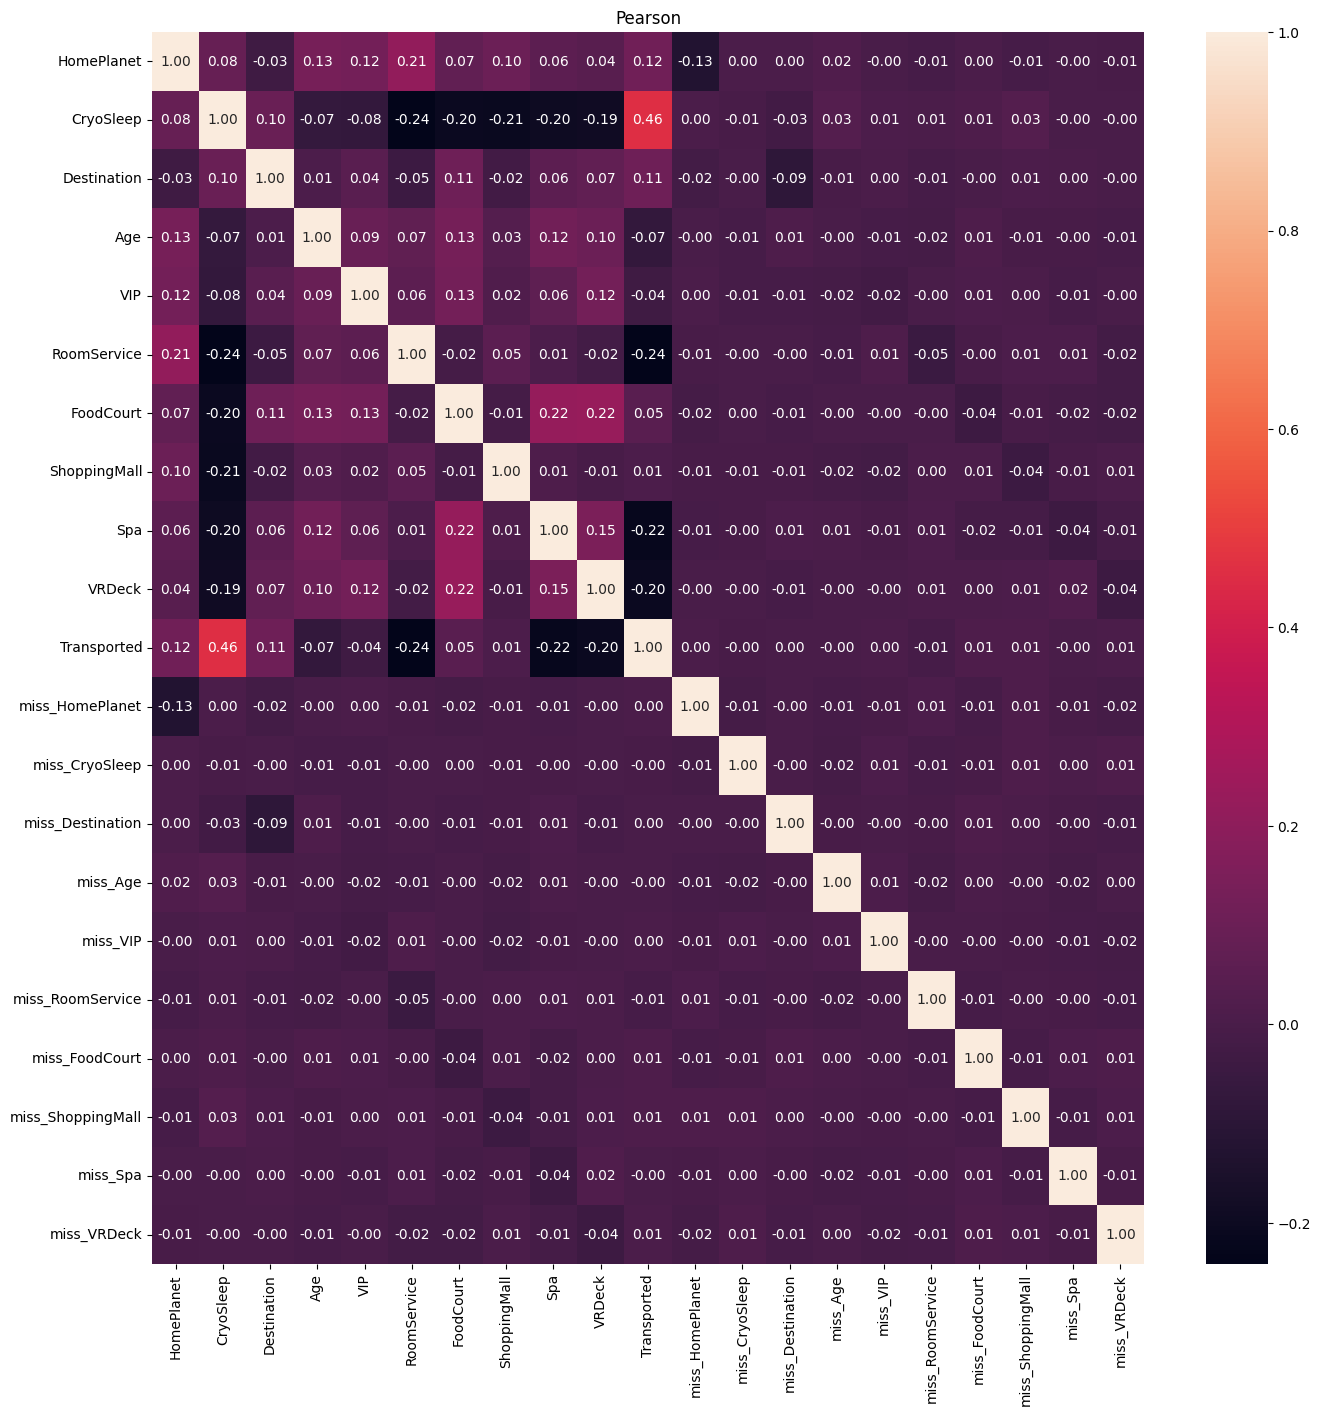

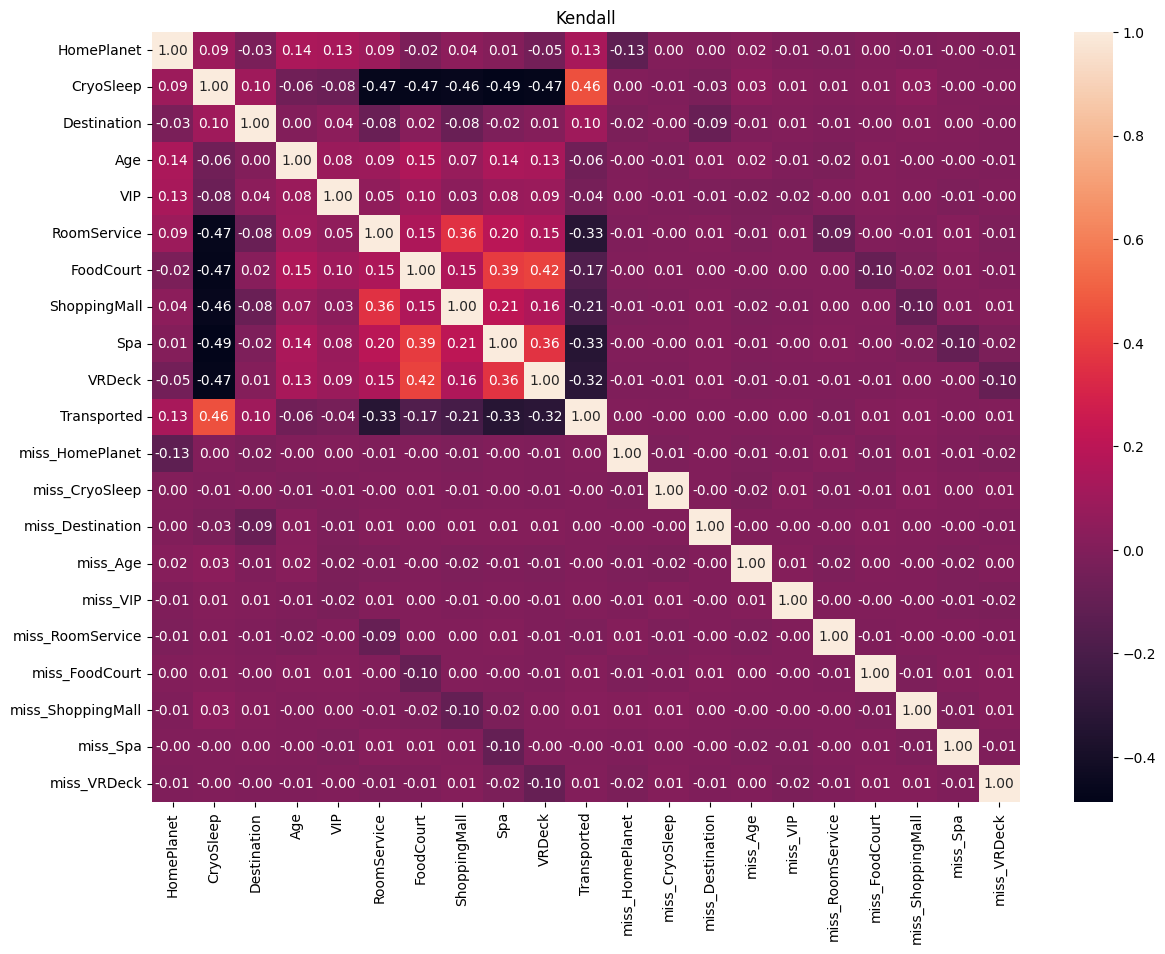

HomePlanet     0.115461
CryoSleep      0.456062
Destination    0.108152
RoomService   -0.241124
Spa           -0.218545
VRDeck        -0.204874
Transported    1.000000
Name: Transported, dtype: float64
HomePlanet      0.129362
CryoSleep       0.456062
Destination     0.100664
RoomService    -0.334189
FoodCourt      -0.170578
ShoppingMall   -0.208744
Spa            -0.333830
VRDeck         -0.318010
Transported     1.000000
Name: Transported, dtype: float64


In [29]:
plt.figure(figsize=(16,16))
plt.title('Pearson')
sns.heatmap(pearson_corr, annot=True, fmt='.2f')
plt.show()

plt.figure(figsize=(14,10))
plt.title('Kendall')
sns.heatmap(kendall_corr, annot=True, fmt='.2f')
plt.show()

print(pearson_corr[pearson_corr['Transported'].abs() > 0.1]['Transported'])
print(kendall_corr[kendall_corr['Transported'].abs() > 0.1]['Transported'])

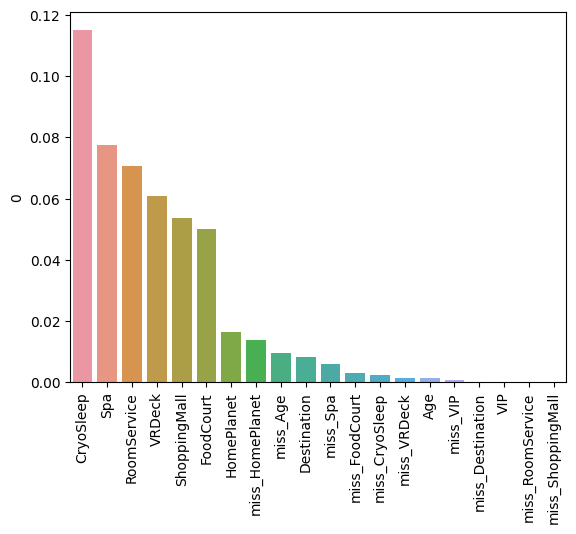

In [65]:
# mutual information
mutual_info = mutual_info_classif(
    X = df_missing.drop(['Transported'], axis=1),
    y = df_missing['Transported'],
#    discrete_features = ['CryoSleep', 'VIP', 'HomePlanet', 'Destination', *[c for c in df_missing.columns if c[:5] == 'miss_']],
)

# reformat mutual info into df
indices = [*df_missing.columns]
indices.remove('Transported')
mi_df = pd.DataFrame(mutual_info, index=indices).sort_values(0, ascending=False)

# show
plt.xticks(rotation=90)
sns.barplot(x=mi_df.index, y=mi_df[0])
plt.show()

ROC-AUC: 0.8742797442740965


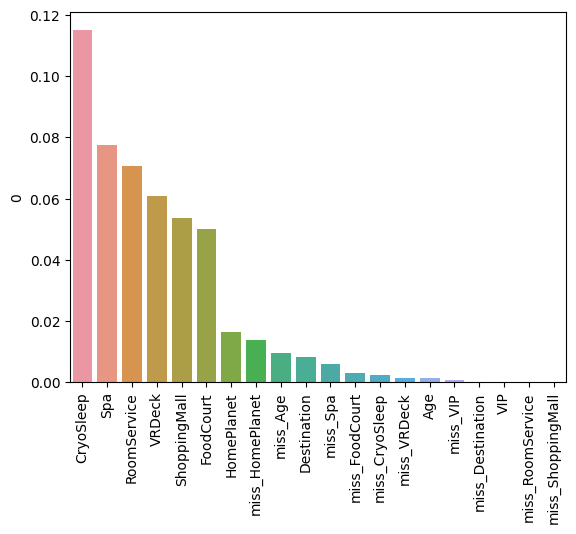

In [71]:
# random forest feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=1000, max_depth=7)
scores = cross_val_score(model, df_train.drop('Transported', axis=1), df_train['Transported'], cv=5, scoring='roc_auc')
model.fit(df_train.drop('Transported', axis=1), df_train['Transported'])
fe_df = pd.DataFrame(model.feature_importances_, index=df_train.drop('Transported', axis=1).columns)

# show
print('ROC-AUC:', scores.mean())
plt.xticks(rotation=90)
sns.barplot(x=mi_df.index, y=mi_df[0])
plt.show()

> **Note**
>
> - Columns with **high** correlation with target are:
>   - CryoSleep
>   - Spa  
>   - RoomService 
>   - VRDeck  
>   - ShoppingMall
>   - FoodCourt 
> - Columns with **medium** correlation with target are:
>   - HomePlanet  
>   - miss_HomePlanet
>   - miss_Age
>   - Destination    
> - Most missing values have **no correlation** with target
> - Other columns have **low** correlation

## Select columns

In [80]:
high_corr_columns = ['CryoSleep', 'Spa', 'RoomService', 'VRDeck', 'ShoppingMall', 'FoodCourt'] 
medium_corr_columns = ['HomePlanet', 'miss_HomePlanet', 'miss_Age', 'Destination']
selected_columns = high_corr_columns + medium_corr_columns
df_train = df_missing[selected_columns + ['Transported']]
df_train

,CryoSleep,Spa,RoomService,VRDeck,ShoppingMall,FoodCourt,HomePlanet,miss_HomePlanet,miss_Age,Destination,Transported
PassengerId,,,,,,,,,,,
0001_01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0002_01,0.0,549.0,109.0,44.0,25.0,9.0,0.0,0.0,0.0,0.0,1.0
0003_01,0.0,6715.0,43.0,49.0,0.0,3576.0,1.0,0.0,0.0,0.0,0.0
0003_02,0.0,3329.0,0.0,193.0,371.0,1283.0,1.0,0.0,0.0,0.0,0.0
0004_01,0.0,565.0,303.0,2.0,151.0,70.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,0.0,1643.0,0.0,74.0,0.0,6819.0,1.0,0.0,0.0,2.0,0.0
9278_01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9279_01,0.0,1.0,0.0,0.0,1872.0,0.0,0.0,0.0,0.0,0.0,1.0


## Check correlation between features

In [81]:
pearson = df_train.drop('Transported', axis=1).corr(method='pearson')
kendall = df_train.drop('Transported', axis=1).corr(method='kendall')

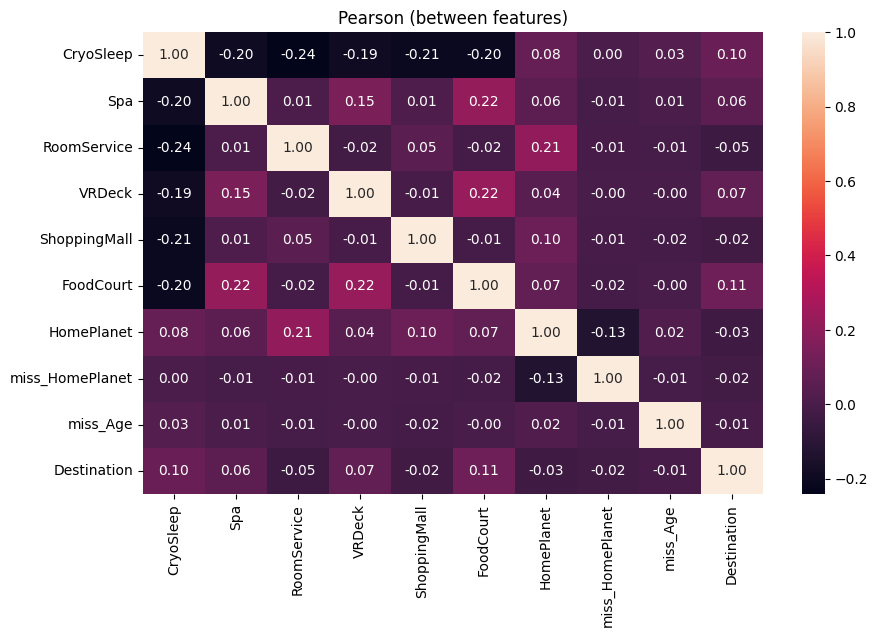

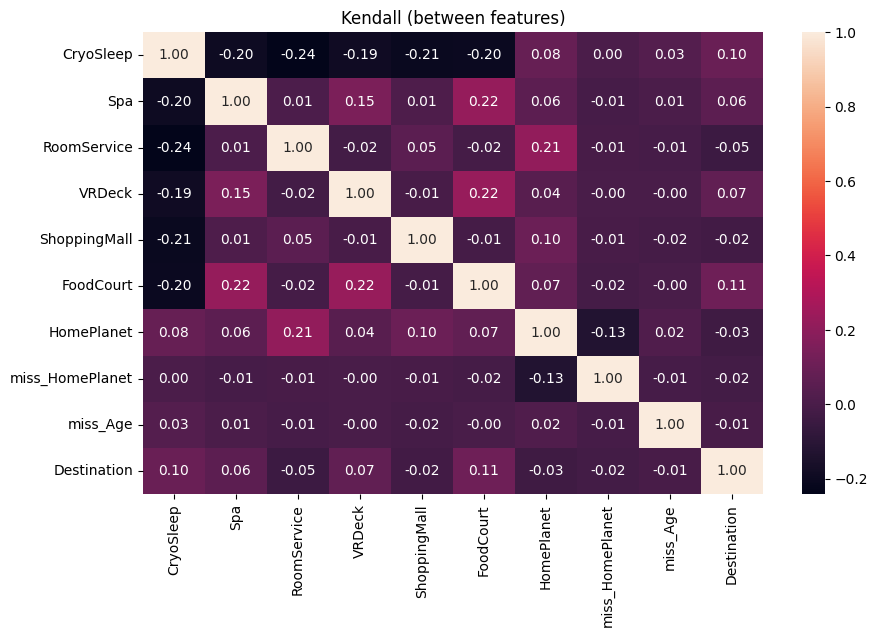

In [82]:
# pearson
plt.figure(figsize=(10,6))
plt.title('Pearson (between features)')
sns.heatmap(pearson, annot=True, fmt='.2f')
plt.show()

# kendall
plt.figure(figsize=(10,6))
plt.title('Kendall (between features)')
sns.heatmap(pearson, annot=True, fmt='.2f')
plt.show()

> Note
>
> There is **no high correlation** between the features.

## TO DO

- Split Cabin feature
- Extract sex from name
- Rescale exponential features

## TEST

In [83]:
# TEST
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

df = df_train.drop('Transported', axis=1)
df_norm = (df-df.min())/(df.max()-df.min())
df_norm = pd.concat((df_norm, df_train['Transported']), axis=1)

model = MLPClassifier(max_iter=1000, hidden_layer_sizes=(10,20,20,10), learning_rate_init=0.001)
score = cross_val_score(model, df_norm[selected_columns], df_norm['Transported'], cv=5
                        , scoring='roc_auc')

In [85]:
score.mean()

0.8658879212746384

In [57]:
df_norm

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,0.5,0.0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
0002_01,0.0,0.0,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0
0003_01,0.5,0.0,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0
0003_02,0.5,0.0,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0
0004_01,0.0,0.0,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,0.5,0.0,1.0,0.518987,1.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.0
9278_01,0.0,1.0,0.5,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9279_01,0.0,0.0,0.0,0.329114,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,1.0
